In [8]:
import pandas as pd 
import matplotlib as plt
import geopandas as gpd
import contextily as ctx



Data set has no null vlaues at all all columns are filled out 

In [9]:

filePath = 'TransitData.csv'
rawDF=pd.read_csv(filePath)
rawDF.info()
rawDF.isnull().sum()
rawDF.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704539 entries, 0 to 704538
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       704539 non-null  object 
 1   Time       704539 non-null  object 
 2   Class      704539 non-null  object 
 3   Operation  704539 non-null  object 
 4   Bus        704539 non-null  int64  
 5   Route      704539 non-null  int64  
 6   Latitude   704539 non-null  float64
 7   Longitude  704539 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 43.0+ MB


,Date,Time,Class,Operation,Bus,Route,Latitude,Longitude
count,704539,704539,704539,704539,704539.000000,704539.000000,704539.000000,704539.000000
unique,31,1242,11,6,NaN,NaN,NaN,NaN
top,2017-10-05 0:00,1900-01-01 14:47,QUEENS,Exact Fare,NaN,NaN,NaN,NaN
freq,30372,1685,219294,380789,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1241.137280,239.365809,40.941516,-70.604451
std,NaN,NaN,NaN,NaN,317.249714,288.489481,13.694826,21.473093
min,NaN,NaN,NaN,NaN,315.000000,1.000000,0.000000,-255.426092
25%,NaN,NaN,NaN,NaN,1047.000000,3.000000,44.224635,-76.526580
50%,NaN,NaN,NaN,NaN,1361.000000,15.000000,44.232833,-76.502100
75%,NaN,NaN,NaN,NaN,1480.000000,502.000000,44.248020,-76.486999


echo "# CISC415_ASS1" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/amirRafati/CISC415_ASS1.git
git push -u origin main

/var/folders/ym/0_vtz1kx4_5fl0q9222rj5n40000gn/T/ipykernel_79608/3350941437.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'].str.split().str[1])


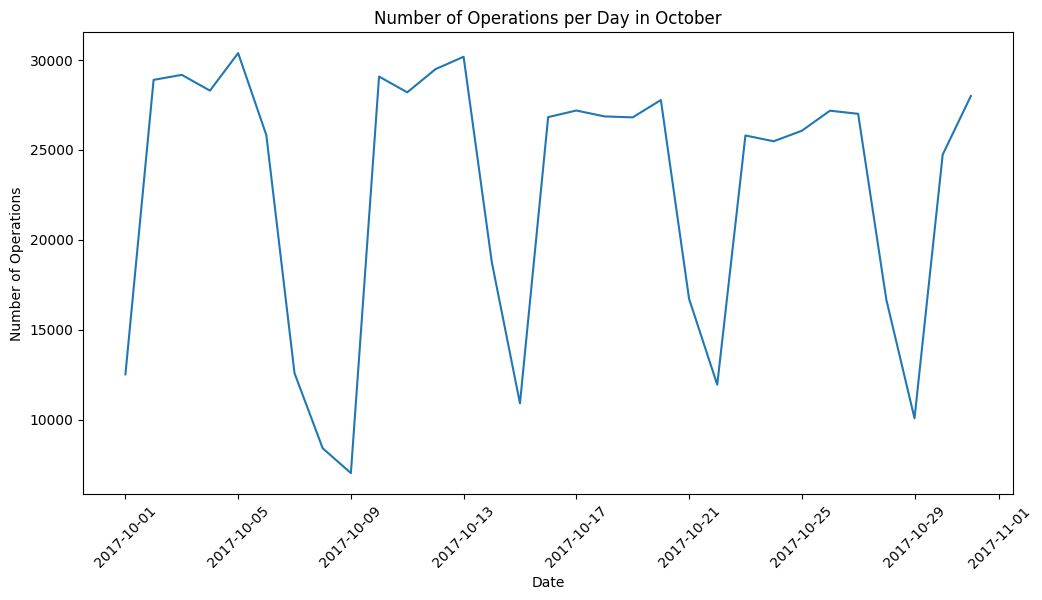

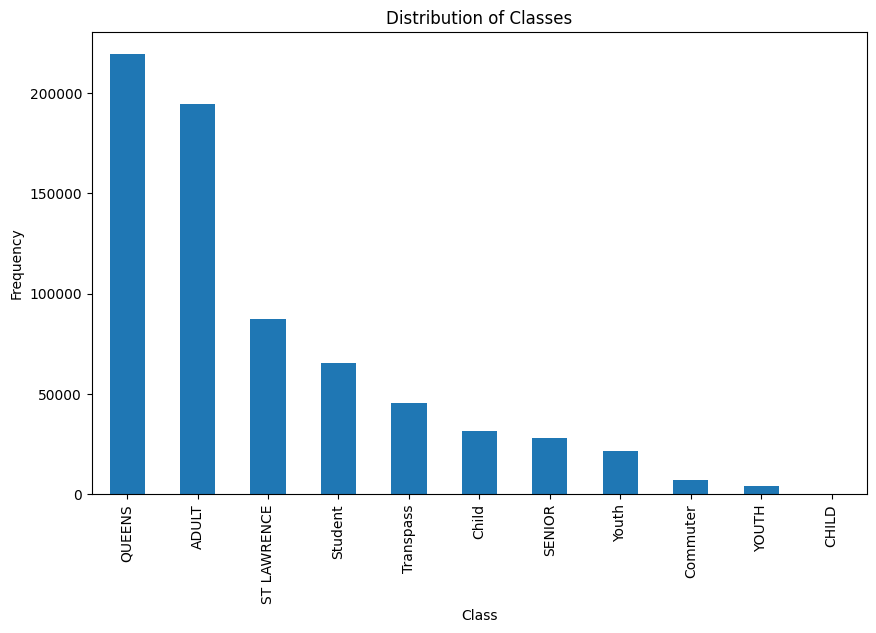

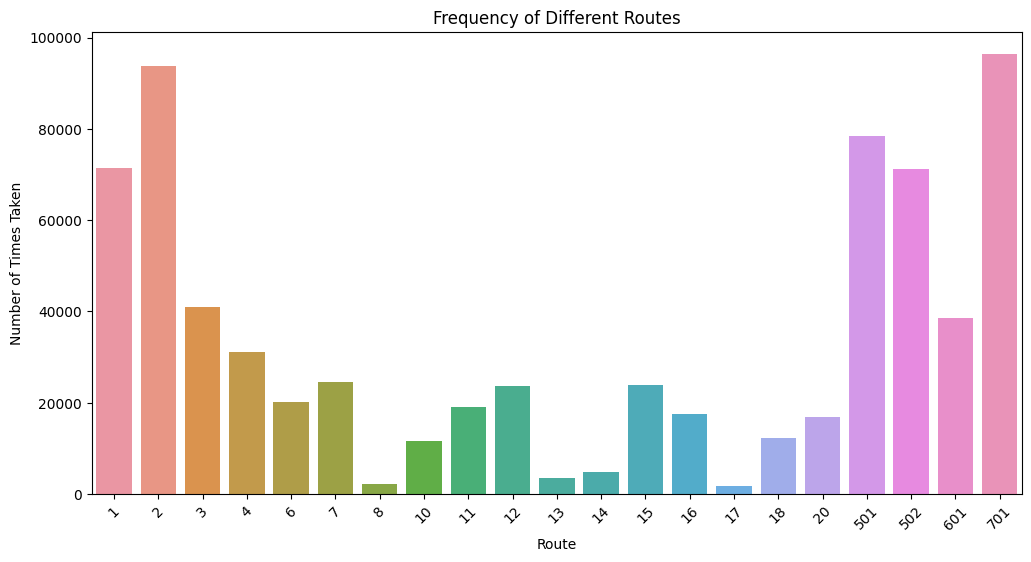

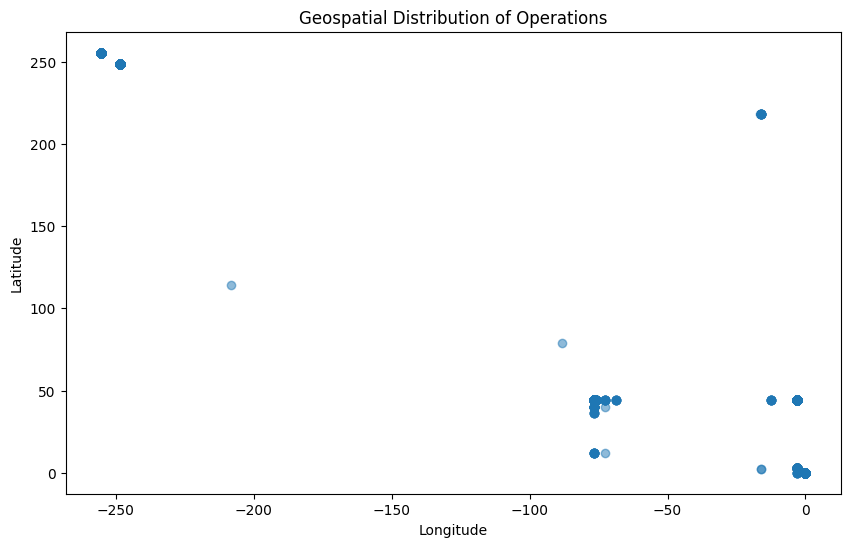

TypeError: unsupported operand type(s) for &: 'float' and 'float'

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'TransitData.csv'
data = pd.read_csv(file_path)

# Convert 'Date' and 'Time' to datetime
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'].str.split().str[1])
data['Date'] = pd.to_datetime(data['Date']).dt.date

# 1. Time Series Analysis: Number of operations per day
operations_per_day = data.groupby('Date').size()
plt.figure(figsize=(12, 6))
operations_per_day.plot()
plt.title('Number of Operations per Day in October')
plt.xlabel('Date')
plt.ylabel('Number of Operations')
plt.xticks(rotation=45)
plt.show()

# 2. Class Distribution
class_distribution = data['Class'].value_counts()
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# 3. Route Analysis
route_frequency = data['Route'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=route_frequency.index, y=route_frequency.values)
plt.title('Frequency of Different Routes')
plt.xlabel('Route')
plt.ylabel('Number of Times Taken')
plt.xticks(rotation=45)
plt.show()

# 4. Geospatial Plot (Scatter plot for Latitude and Longitude)
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], alpha=0.5)
plt.title('Geospatial Distribution of Operations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()




# Filter out coordinates outside of Kingston
data = data[(data['Latitude']) & (data['Latitude'])]

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))
gdf.crs = 'EPSG:4326'  # Set coordinate reference system to WGS 84

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
gdf.to_crs(epsg=3857).plot(ax=ax, color='blue', markersize=5, alpha=0.5)  # Convert to Web Mercator
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Add map basemap
ax.set_axis_off()
plt.show()



ValueError: Axis limits cannot be NaN or Inf

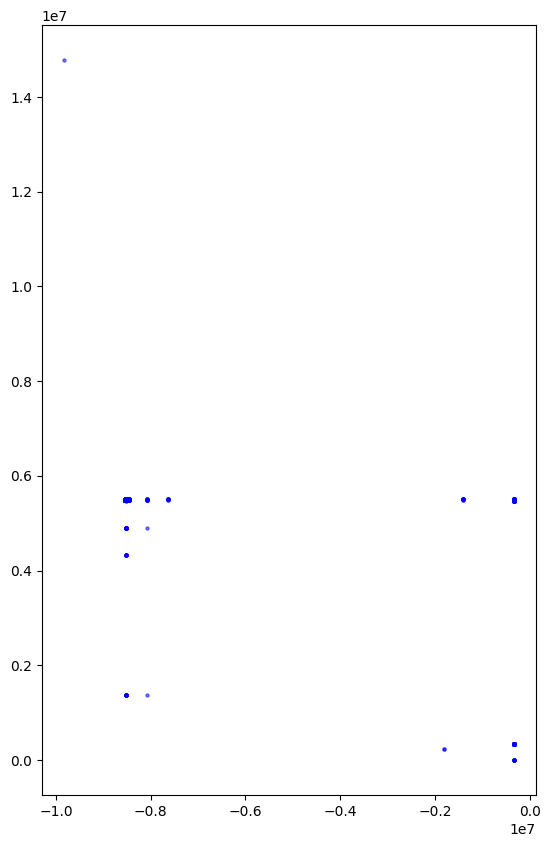

In [15]:
file_path = 'TransitData.csv'
data = pd.read_csv(file_path)
data = data[(data['Latitude'] != 0) & (data['Longitude'] != 0)]
lat_min, lat_max = 44.180, 44.300
lon_min, lon_max = -76.650, -76.450

# Filter out coordinates outside of Kingston
data = data[(data['Latitude'] >= lat_min) & (data['Latitude'] <= lat_max) & 
            (data['Longitude'] >= lon_min) & (data['Longitude'] <= lon_max)]

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))
gdf.crs = 'EPSG:4326'  # Set coordinate reference system to WGS 84

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
gdf.to_crs(epsg=3857).plot(ax=ax, color='blue', markersize=5, alpha=0.5)  # Convert to Web Mercator

# Define the map boundaries for Kingston, Ontario
xlim = ([min(gdf.to_crs(epsg=3857).geometry.x),
         max(gdf.to_crs(epsg=3857).geometry.x)])
ylim = ([min(gdf.to_crs(epsg=3857).geometry.y),
         max(gdf.to_crs(epsg=3857).geometry.y)])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Add map basemap
ax.set_axis_off()
plt.show()